In [35]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import MollweideAxes

In [36]:
# Function to convert spin axis to radians
def spin_axis_to_radians(spin_axis):
    return (spin_axis - 90) * np.pi / 180

In [37]:
# Mollweide projection function
def mollweide_projection(lon, lat):
    lon = np.radians(lon)
    lat = np.radians(lat)

    theta = lat
    phi = np.arcsin(2 * theta / np.pi)
    lambda_ = lon / (2 * np.cos(phi))

    x = 2 * np.sqrt(2) / np.pi * lambda_ * np.cos(phi)
    y = np.sqrt(2) * np.sin(phi)

    return x, y

In [38]:
test = pd.read_csv('Duffey_Tyler_2022.csv')
pitch_data = test[(test['pitch_type'] == 'FF')]

# Extract relevant columns
relevant_columns = ['player_name','pitch_type', 'release_speed', 'release_spin_rate', 'release_extension', 'release_pos_x', 'release_pos_z', 'spin_axis']
pitch_data = pitch_data[relevant_columns]
print(pitch_data.head())

      player_name pitch_type  release_speed  release_spin_rate  \
0   Duffey, Tyler         FF           90.0               2168   
5   Duffey, Tyler         FF           90.7               2230   
6   Duffey, Tyler         FF           90.9               2269   
8   Duffey, Tyler         FF           90.9               2138   
10  Duffey, Tyler         FF           90.4               2208   

    release_extension  release_pos_x  release_pos_z  spin_axis  
0                 6.3          -2.39           6.23        201  
5                 6.5          -2.50           6.10        210  
6                 6.3          -2.60           6.16        202  
8                 6.3          -2.52           6.16        206  
10                6.3          -2.65           6.08        201  


In [39]:
# Convert spin axis to radians
pitch_data['spin_axis_radians'] = pitch_data['spin_axis'].apply(spin_axis_to_radians)
print(pitch_data.head())

      player_name pitch_type  release_speed  release_spin_rate  \
0   Duffey, Tyler         FF           90.0               2168   
5   Duffey, Tyler         FF           90.7               2230   
6   Duffey, Tyler         FF           90.9               2269   
8   Duffey, Tyler         FF           90.9               2138   
10  Duffey, Tyler         FF           90.4               2208   

    release_extension  release_pos_x  release_pos_z  spin_axis  \
0                 6.3          -2.39           6.23        201   
5                 6.5          -2.50           6.10        210   
6                 6.3          -2.60           6.16        202   
8                 6.3          -2.52           6.16        206   
10                6.3          -2.65           6.08        201   

    spin_axis_radians  
0            1.937315  
5            2.094395  
6            1.954769  
8            2.024582  
10           1.937315  


c:\Users\logan.kniss\AppData\Local\miniconda3\envs\local\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


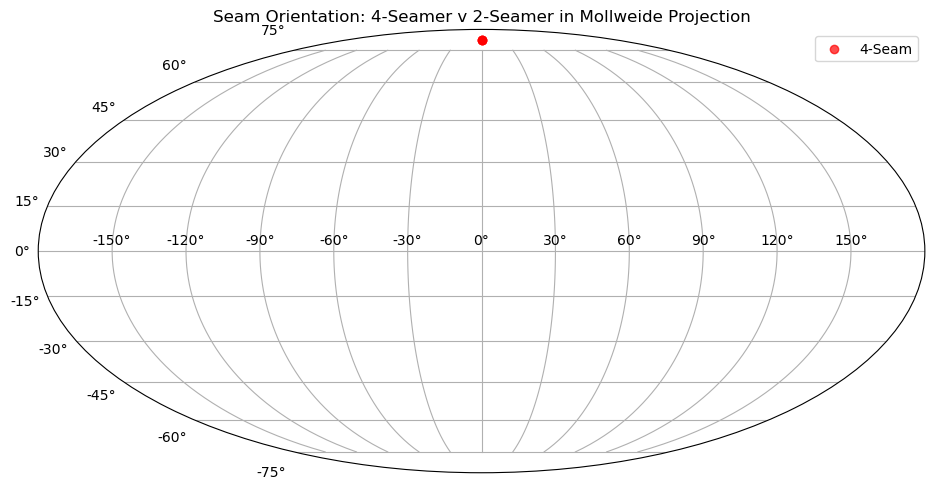

In [40]:
# Create a new figure with Mollweide projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')

# Plot 4-seam fastballs
ff_data = pitch_data[pitch_data['pitch_type'] == 'FF']
ff_x, ff_y = mollweide_projection(ff_data['spin_axis_radians'], ff_data['release_speed'])
ax.scatter(ff_x, ff_y, label='4-Seam', color='red', alpha=0.7)
# Add labels and legend
ax.set_title('Seam Orientation: 4-Seamer v 2-Seamer in Mollweide Projection')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

In [24]:
def estimate_seam_orientation(row):
    # Example function to estimate seam orientation
    # Seam orientation can be derived from the spin axis and release position
    # Here, we'll use a simplified example
    orientation = (row['release_pos_x']**2 + row['release_pos_z']**2)**0.5 * row['spin_axis']
    return orientation

pitch_data['seam_orientation'] = pitch_data.apply(estimate_seam_orientation, axis=1)

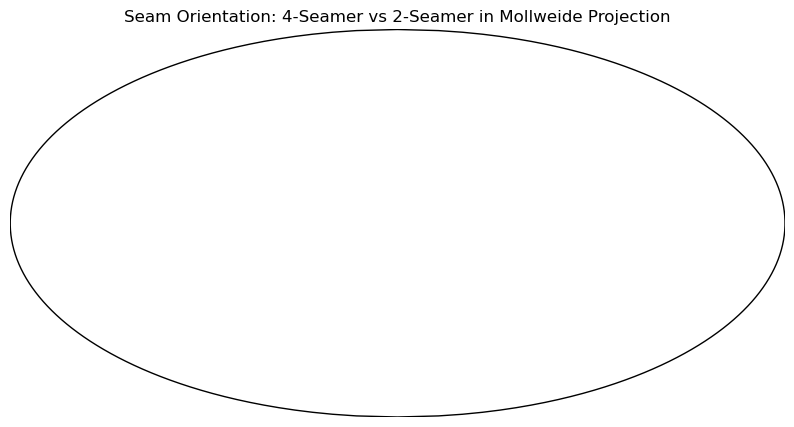

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.colors as mcolors

# Create a new figure
fig = plt.figure(figsize=(10, 6))

# Setup the Mollweide projection
m = Basemap(projection='moll', lon_0=0)

# Convert seam orientation pitch_data to plot coordinates
lons = np.degrees(np.arctan2(pitch_data['release_pos_x'].values, pitch_data['release_pos_z'].values))
lats = pitch_data['spin_axis'].values  # Spin axis as latitude for visualization

# Map pitch types to colors
color_map = {'FF': 'red', 'SI': 'green'}
colors = pitch_data['pitch_type'].map(color_map).values
colors_rgba = [mcolors.to_rgba(c) for c in colors]

# Plot the pitch_data
x, y = m(lons, lats)
m.scatter(x, y, c=colors_rgba, s=10, alpha=0.7)

# Add title and show the plot
plt.title('Seam Orientation: 4-Seamer vs 2-Seamer in Mollweide Projection')
plt.show()
